In [31]:
import numpy as np
import pandas as pd

from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
data['Month'] = data['Month'].apply(lambda x: pd.to_datetime(x+str('-15')))
data.set_index('Month', inplace=True)
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [29]:
ts = data['#Passengers']

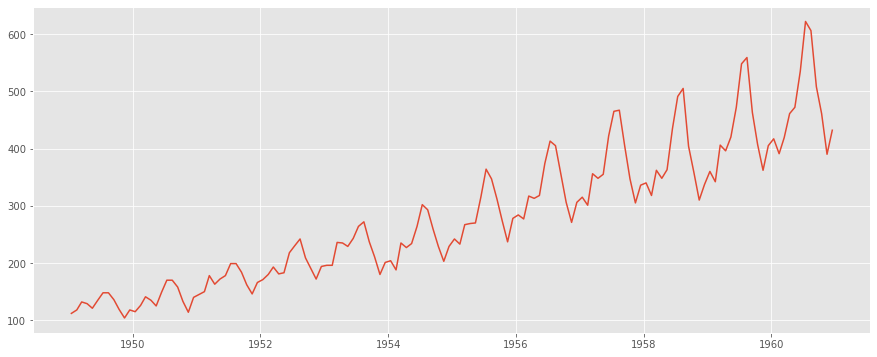

In [32]:
plt.plot(ts)

In [33]:
ts_log = np.log(ts)


In [40]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center = False).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard DEviation')
    plt.show(block=False)
    
    print("Results of Dickey-fuller test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used',
                                             'Number of observations used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

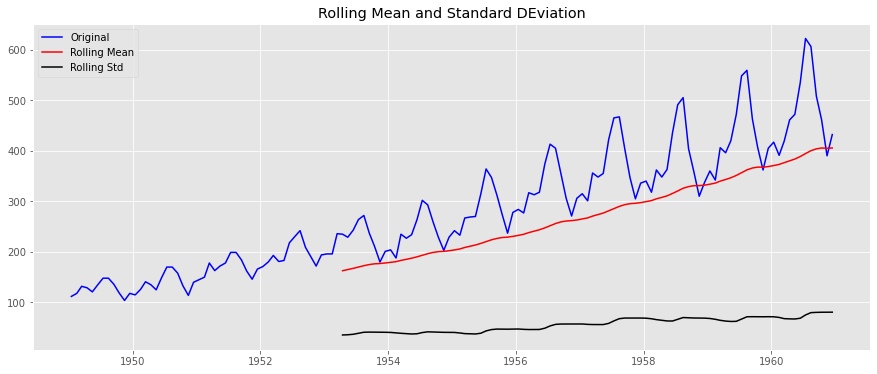

Results of Dickey-fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
NUmber of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [41]:
test_stationarity(data['#Passengers'])

In [42]:
# from observations and plot, test statistics is more than critical value 
# and moving average is not constant over time, so null hypothesis of dickey fuller test cannot be rejected
# This shows that the timeseies is not stationary
# Decomposing the data, plot the mocing average

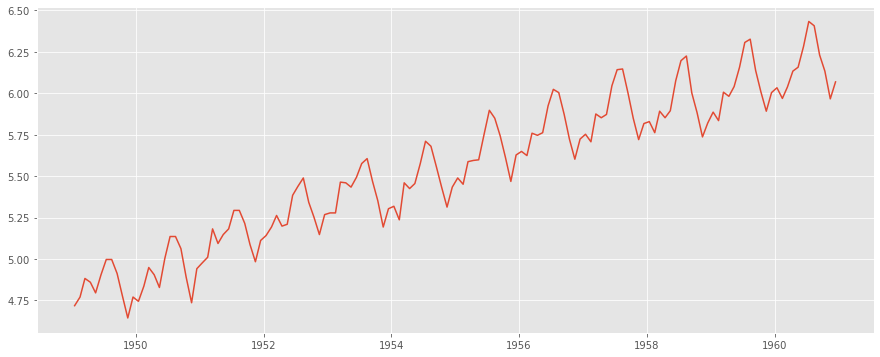

In [43]:
plt.plot(ts_log)

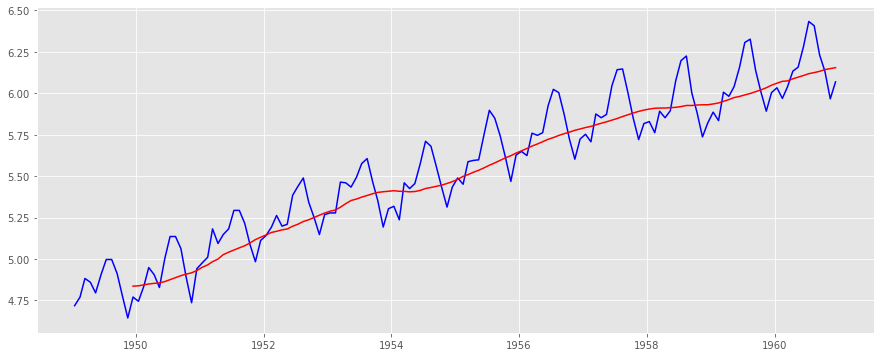

In [49]:
movingAverage = ts_log.rolling(window=12).mean()
movingStd = ts_log.rolling(window=12).std()
plt.plot(ts_log, color = 'blue')
plt.plot(movingAverage, color='red')

In [52]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)


Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

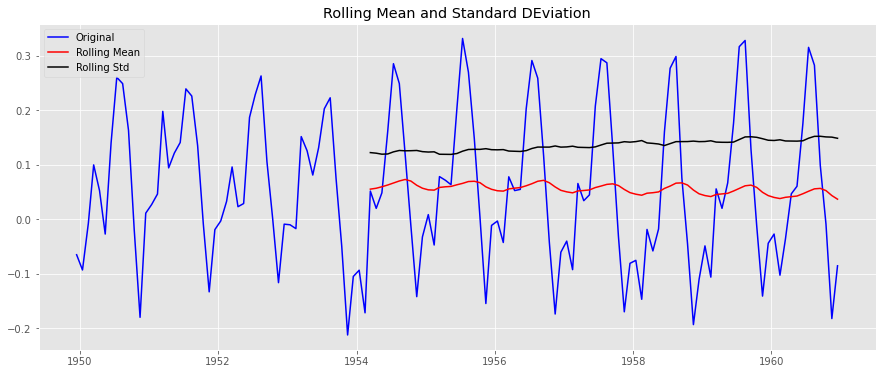

Results of Dickey-fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
NUmber of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [53]:
test_stationarity(ts_log_mv_diff)